## Madhavi Ghanta
### DSC 550 
####  Milestone 1,2,3 &4

Analyze data to predict the traits to detect Autistics disease amoung the toddlers
* Data Source : https://www.kaggle.com/fabdelja/autism-screening-for-toddlers?select=Toddler+Autism+dataset+July+2018.csv

** Description about Dataset:

The dataset was developed by Dr Fadi Fayez Thabtah (fadifayez.com) using a mobile app called ASDTests (ASDtests.com) to screen autism in toddlers.we can use it to estimate the predictive power of machine learning techniques in detecting autistic traits

Abstract: Autistic Spectrum Disorder (ASD) is a neurodevelopmental condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis. The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits

In [1]:
# import library

import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
import numpy as np

C:\Users\mghan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Columns Details : Features collected and their descriptions 
Feature Type Description Variable in Dataset Corresponding Q-chat-10-Toddler Features 
* Does your child look at you when you call his/her name? 
* How easy is it for you to get eye contact with your child? 
* Does your child point to indicate that s/he wants something? (e.g. a toy that is out of reach)
* Does your child point to share interest with you? (e.g. poin9ng at an interes9ng sight)
* Does your child pretend? (e.g. care for dolls, talk on a toy phone)
* Does your child follow where you’re looking? 
* If you or someone else in the family is visibly upset, does your child show signs of wan9ng to comfort them? (e.g. stroking hair, hugging them)
* Would you describe your child’s first words as: 
* Does your child use simple gestures? (e.g. wave goodbye) 
* Does your child stare at nothing with no apparent purpose?
* Age Number Toddlers (months)
* Score by Q-chat-10 Number 1-10 (Less that or equal 3 no ASD traits; > 3 ASD traits 
* Sex Character Male or Female Ethnicity String List of common ethnicities in text format 
* Born with jaundice Boolean (yes or no) Whether the case was born with jaundice
* Family member with ASD history Boolean (yes or no)
* Whether any immediate family member has a PDD Who is completing the test String Parent, self, caregiver, medical staff, clinician ,etc. 
* Why_are_you_taken_the_screening String Use input textbox Class variable String ASD traits or No ASD traits (automatically assigned by the ASDTests app). (Yes / No)

In [2]:
# 1.	Load the data from the “Toddler Autism dataset July 2018.csv” file into a DataFrame.
addr1 = "C:/Users/mghan/Documents/DSC550/TermProject/Toddler Autism dataset July 2018.csv"
df_todd = pd.read_csv(addr1)
df_todd.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD_Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [3]:
df_todd.isnull().sum() # find out the missing values in the dataset's for all variables

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
ASD_Traits                0
dtype: int64

In [4]:
df_todd.info() # find out the datatype for each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [5]:
#5.	Look at summary information about your data (total, mean, min, max, freq, unique, etc.)  Does this present any more questions for you?  Does it lead you to a conclusion yet?
print("\nDescribe Data\n")
print(df_todd.describe())


Describe Data

           Case_No           A1           A2           A3           A4  \
count  1054.000000  1054.000000  1054.000000  1054.000000  1054.000000   
mean    527.500000     0.563567     0.448767     0.401328     0.512334   
std     304.407895     0.496178     0.497604     0.490400     0.500085   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     264.250000     0.000000     0.000000     0.000000     0.000000   
50%     527.500000     1.000000     0.000000     0.000000     1.000000   
75%     790.750000     1.000000     1.000000     1.000000     1.000000   
max    1054.000000     1.000000     1.000000     1.000000     1.000000   

                A5           A6           A7           A8           A9  \
count  1054.000000  1054.000000  1054.000000  1054.000000  1054.000000   
mean      0.524668     0.576850     0.649905     0.459203     0.489564   
std       0.499628     0.494293     0.477226     0.498569     0.500128   
min       0.000000   

In [6]:
print("\nSummarized Data\n")
print(df_todd.describe(include=['O']))


Summarized Data

         Sex       Ethnicity Jaundice Family_mem_with_ASD  \
count   1054            1054     1054                1054   
unique     2              11        2                   2   
top        m  White European       no                  no   
freq     735             334      766                 884   

       Who completed the test ASD_Traits  
count                    1054       1054  
unique                      5          2  
top             family member        Yes  
freq                     1018        728  


In [7]:
# convert categorical data to numbers
#get the categorical data
df_todd['ASD_Traits'] = df_todd['ASD_Traits'].replace(['Yes', 'No'],[1, 0])
df_todd['Jaundice'] = df_todd['Jaundice'].replace(['yes', 'no'],[1, 0])
df_todd['Family_mem_with_ASD'] = df_todd['Family_mem_with_ASD'].replace(['yes', 'no'],[1, 0])

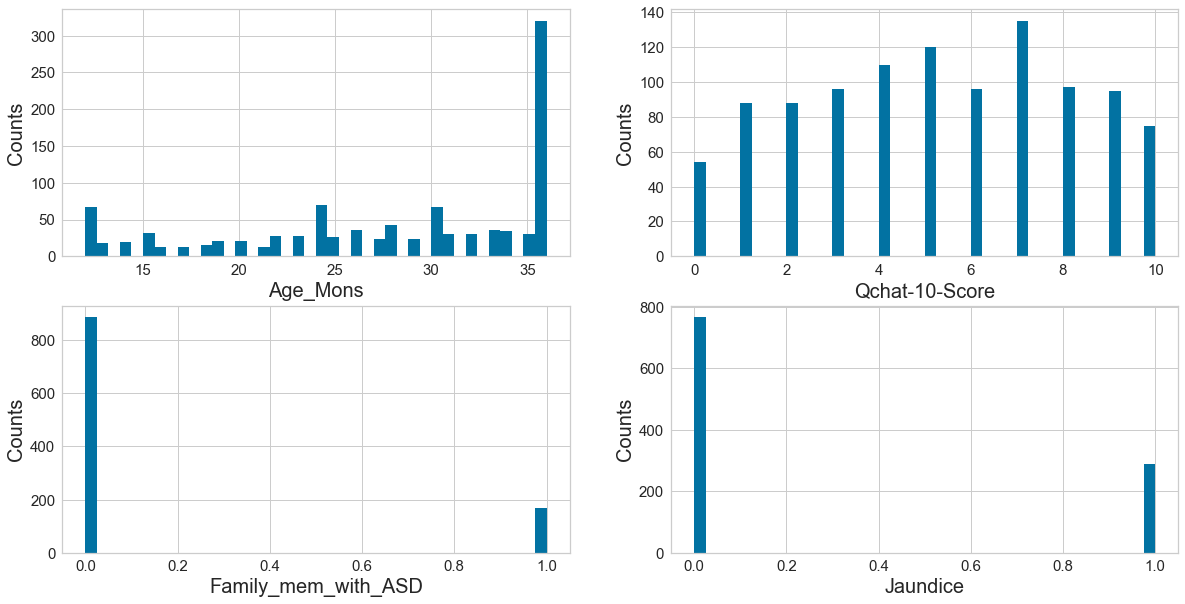

In [8]:
#6.	Make some histograms of your data (“A picture is worth a thousand words!”)
# Specify the features of interest
num_features = ['Age_Mons', 'Qchat-10-Score', 'Family_mem_with_ASD', 'Jaundice']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df_todd[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

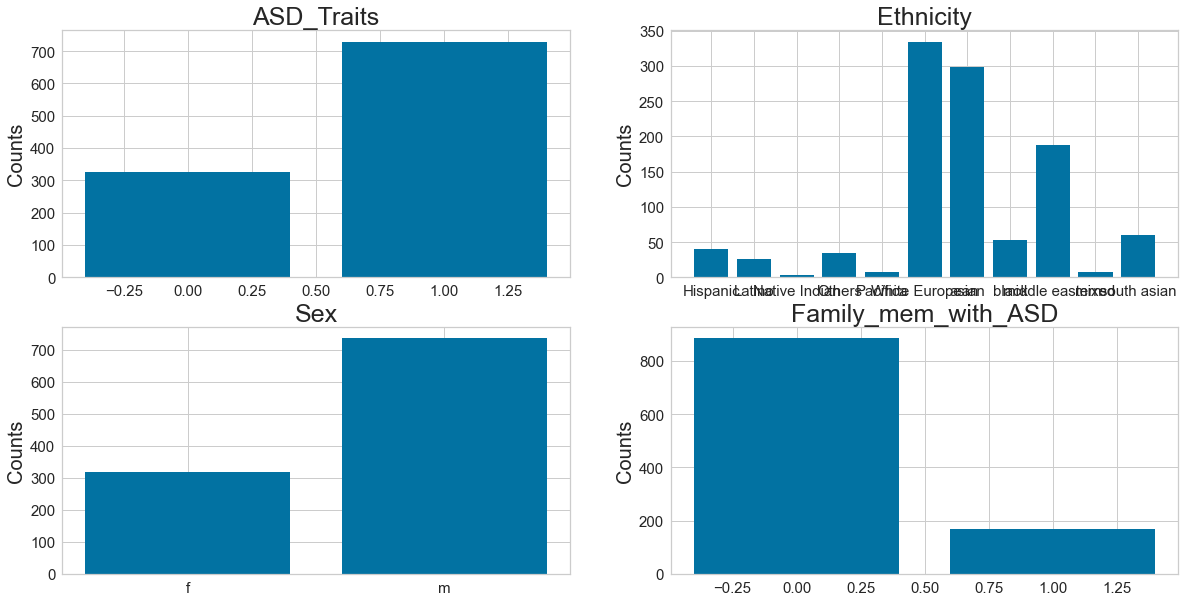

In [9]:
#7:  Barcharts: set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_ASD_Traits = df_todd.groupby('ASD_Traits').size().reset_index(name='Counts')['ASD_Traits']
Y_ASD_Traits = df_todd.groupby('ASD_Traits').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_ASD_Traits, Y_ASD_Traits)
axes[0, 0].set_title('ASD_Traits', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Ethnicity = df_todd.groupby('Ethnicity').size().reset_index(name='Counts')['Ethnicity']
Y_Ethnicity = df_todd.groupby('Ethnicity').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Ethnicity, Y_Ethnicity)
axes[0, 1].set_title('Ethnicity', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = df_todd.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = df_todd.groupby('Sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visualizer
X_Family_mem_with_ASD = df_todd.groupby('Family_mem_with_ASD').size().reset_index(name='Counts')['Family_mem_with_ASD']
Y_Family_mem_with_ASD = df_todd.groupby('Family_mem_with_ASD').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Family_mem_with_ASD, Y_Family_mem_with_ASD)
axes[1, 1].set_title('Family_mem_with_ASD', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show()

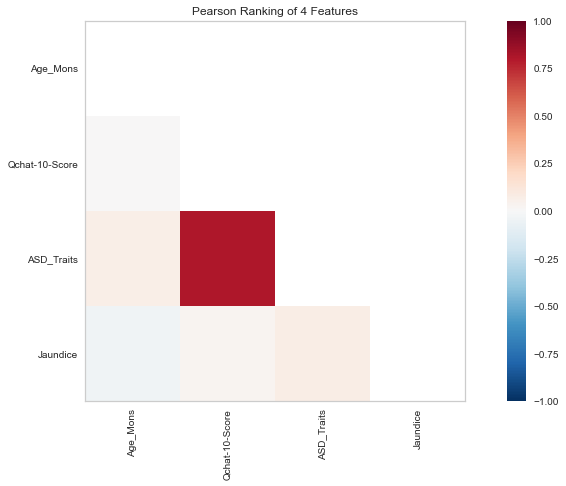

In [10]:
# The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation)  
# These results show there is  positive correlation between 'ASD_Traits' & 'Qchat-10-Score', but it’s not a high correlation amoung other variables.

#Step 8: Pearson Ranking
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D
num_features = ['Age_Mons', 'Qchat-10-Score', 'ASD_Traits', 'Jaundice']
# Define features to test for correlation
# extract the numpy arrays from the data frame
X = df_todd[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pcoords1.png") # Draw/show/poof the data
plt.show()

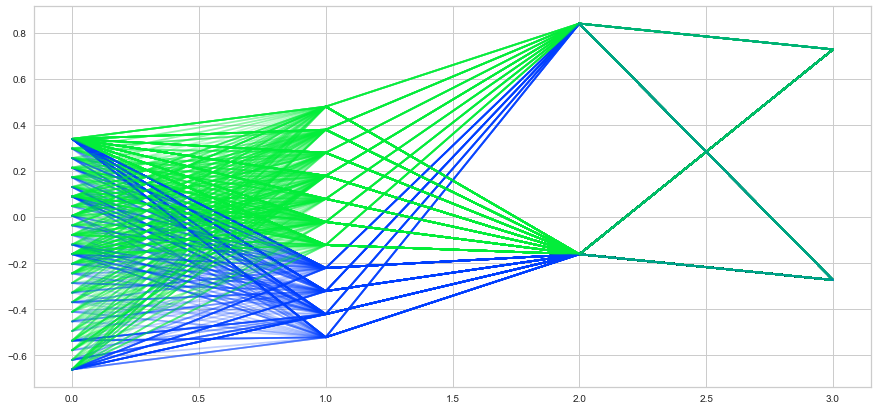

In [11]:
# Use Parallel Coordinates visualization to compare the distributions of numerical variables between 
# toddlers that ASD_Trait  and those that did not have ASD_Trait.
# toddlers with Family_mem_with_ASD & having the lower Qchat-10-Score have agreater chance of ASD , however Joundice is not contibuting factor for AsD infections


# Step 9:  Compare variables against ASD_Traits_YES and ASD_Traits_No
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['ASD_Traits_YES', 'ASD_Traits_NO']
num_features = ['Age_Mons', 'Qchat-10-Score', 'Family_mem_with_ASD', 'Jaundice']
# copy data to a new dataframe
data_norm = df_todd.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (df_todd[feature] - df_todd[feature].mean(skipna=True)) / (df_todd[feature].max(skipna=True) - df_todd[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].to_numpy()
y = df_todd.ASD_Traits.to_numpy()

# Instantiate the visualizer

visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
plt.show();


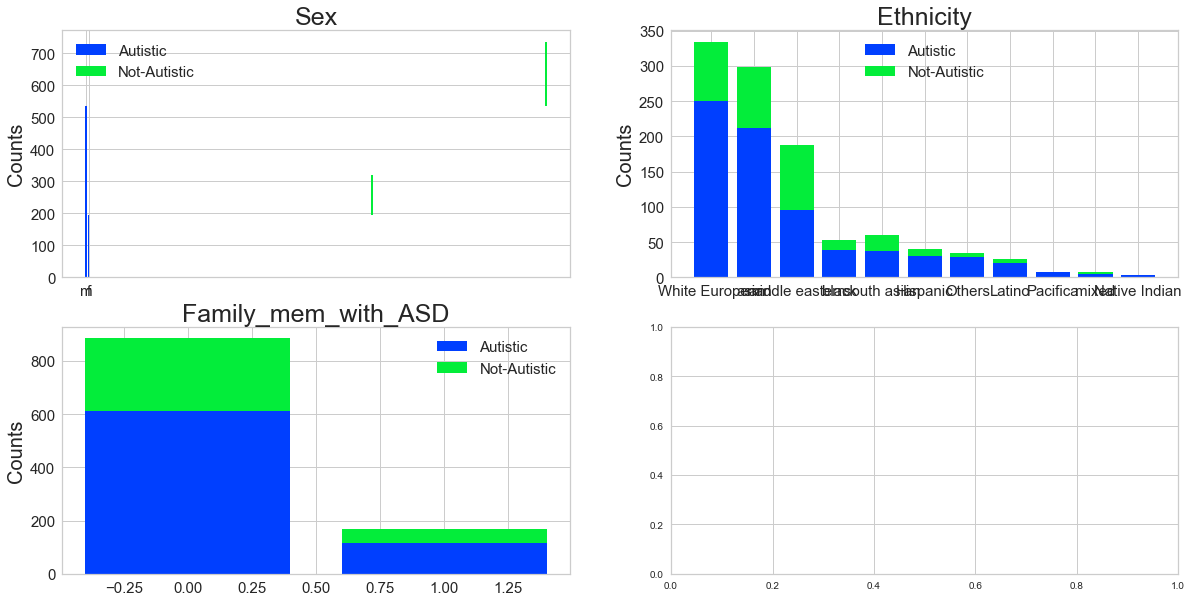

In [12]:
# Use Stack Bar Charts to compare toddlers who is having ASD &  who didn’t have ASD based on the other variables.
# less females have ASD as compared to MEN, white europian is having more rate for insfaction from ASD, 
# Family with ASD history and with Non ASD history, in  both toddlers have ASD


# Step 10 - stacked bar charts to compare autistic/not autistic
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
Sex_autism = df_todd[df_todd['ASD_Traits']==1]['Sex'].value_counts()
Sex_not_autism = df_todd[df_todd['ASD_Traits']==0]['Sex'].value_counts()
Sex_not_autism = Sex_not_autism.reindex(index = Sex_autism.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_autism.index, Sex_autism.values)
p2 = axes[0, 0].bar(Sex_not_autism, Sex_not_autism.values, bottom=Sex_autism.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Autistic', 'Not-Autistic'), fontsize = 15)

# make the data read to feed into the visualizer
ethnicity_autism = df_todd[df_todd['ASD_Traits']==1]['Ethnicity'].value_counts()
ethnicity_not_autism = df_todd[df_todd['ASD_Traits']==0]['Ethnicity'].value_counts()
ethnicity_not_autism = ethnicity_not_autism.reindex(index = ethnicity_autism.index)
# make the bar plot
p3 = axes[0, 1].bar(ethnicity_autism.index, ethnicity_autism.values)
p4 = axes[0, 1].bar(ethnicity_not_autism.index, ethnicity_not_autism.values, bottom=ethnicity_autism.values)
axes[0, 1].set_title('Ethnicity', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Autistic', 'Not-Autistic'), fontsize = 15)

# make the data read to feed into the visualizer
ASD_autism = df_todd[df_todd['ASD_Traits']==1]['Family_mem_with_ASD'].value_counts()
ASD_not_autism = df_todd[df_todd['ASD_Traits']==0]['Family_mem_with_ASD'].value_counts()
ASD_not_autism = ASD_not_autism.reindex(index = ASD_autism.index)

# make the bar plot
p5 = axes[1, 0].bar(ASD_autism.index, ASD_autism.values)
p6 = axes[1, 0].bar(ASD_not_autism.index, ASD_not_autism.values, bottom=ASD_autism.values)
axes[1, 0].set_title('Family_mem_with_ASD', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Autistic', 'Not-Autistic'), fontsize = 15)

##### Milestone 2 
##### Drop any features that are not useful for your model building and explain why they are not useful.
##### Perform any data extraction/selection steps.
##### Transform features if necessary.
##### Engineer new useful features.
##### Deal with missing data (do not just drop rows or columns without justifying this).
##### Create dummy variables if necessary.

In [13]:
#fill the missing data with median value
# num_features = ['Age_Mons', 'Qchat-10-Score', 'Jaundice', 'Family_mem_with_ASD']
def fill_na_median(df_todd, inplace=True):
    return df_todd.fillna(df_todd.median(), inplace=inplace)

fill_na_median(df_todd['Qchat-10-Score'])

# check the result
print(df_todd['Qchat-10-Score'].describe())

count    1054.000000
mean        5.212524
std         2.907304
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Qchat-10-Score, dtype: float64


In [14]:
# fill with the most represented value
def fill_na_most(df_todd, inplace=True):
    return df_todd.fillna('family member', inplace=inplace)

fill_na_most(df_todd['Who completed the test'])

# check the result
print(df_todd['Who completed the test'].describe())

count              1054
unique                5
top       family member
freq               1018
Name: Who completed the test, dtype: object


In [15]:
np.unique(df_todd['Who completed the test'])

array(['Health Care Professional', 'Health care professional', 'Others',
       'Self', 'family member'], dtype=object)

#### Observation
##### found data quality issue in one of the variable value of df_todd['Who completed the test'] . so replace the values

In [16]:
df_todd['Who completed the test'] = df_todd['Who completed the test'].replace(['Health Care Professional'],'Health care professional')

In [17]:
np.unique(df_todd['Who completed the test'])

array(['Health care professional', 'Others', 'Self', 'family member'],
      dtype=object)

In [18]:
# check the result
print(df_todd['Who completed the test'].describe())

count              1054
unique                4
top       family member
freq               1018
Name: Who completed the test, dtype: object


In [19]:
# fill with the most represented value
def fill_na_most(df_todd, inplace=True):
    return df_todd.fillna('White European', inplace=inplace)

fill_na_most(df_todd['Ethnicity'])

# check the result
print(df_todd['Ethnicity'].describe())

count               1054
unique                11
top       White European
freq                 334
Name: Ethnicity, dtype: object


In [20]:
# import package
import numpy as np

# log-transformation
def log_transformation(df_todd):
    return df_todd.apply(np.log1p)

df_todd['Qchat-10-Score_log'] = log_transformation(df_todd['Qchat-10-Score'])

# check the data
print(df_todd.describe())

           Case_No           A1           A2           A3           A4  \
count  1054.000000  1054.000000  1054.000000  1054.000000  1054.000000   
mean    527.500000     0.563567     0.448767     0.401328     0.512334   
std     304.407895     0.496178     0.497604     0.490400     0.500085   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     264.250000     0.000000     0.000000     0.000000     0.000000   
50%     527.500000     1.000000     0.000000     0.000000     1.000000   
75%     790.750000     1.000000     1.000000     1.000000     1.000000   
max    1054.000000     1.000000     1.000000     1.000000     1.000000   

                A5           A6           A7           A8           A9  \
count  1054.000000  1054.000000  1054.000000  1054.000000  1054.000000   
mean      0.524668     0.576850     0.649905     0.459203     0.489564   
std       0.499628     0.494293     0.477226     0.498569     0.500128   
min       0.000000     0.000000     0

#### Observation
##### above results shows the new feature qchart-1-score_log columns which contains Log Transformed values for highly skewed data

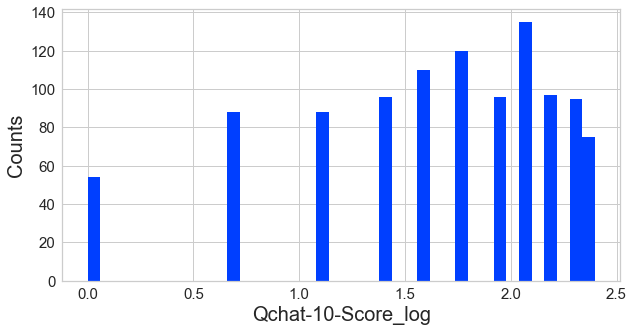

In [21]:
# Log Transformation is a good method to use on highly skewed data.  
#check the distribution using histogram
# set up the figure size
#adjust skewed data (result)

plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(df_todd['Qchat-10-Score_log'], bins=40)
plt.xlabel('Qchat-10-Score_log', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

##### log transformed high skewed values & its counts are showing in historgram

In [22]:
# convert categorical data to numbers
#get the categorical data
cat_features = ['Who completed the test', 'Sex']
data_cat = df_todd[cat_features]
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(8))

   Who completed the test_Health care professional  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
5                                                0   
6                                                0   
7                                                0   

   Who completed the test_Others  Who completed the test_Self  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   
5                              0                            0   
6                              0                          

#### created new dummy variables , Who completed the test_Health Care Professional, Who completed the test_Others, Who completed the test_Self, Who completed the test_family member,Sex_f,Sex_m

### Milestone 3

In Milestone 3, you will begin the process of selecting, building, and evaluating a model. You are required to train and evaluate at least one model in this milestone. Write step-by-step for performing each of these steps. You can use any methods/tools you think are most appropriate, but you should explain/justify why you are selecting the model(s) and evaluation metric(s) you choose. It is important to think about what type of model and metric makes sense for your problem. Again, do what makes the most sense for your project. Write a short overview/conclusion of the insights gained from your model building/evaluation.
It is important to note that these milestones are meant to keep you on track for the final project submission. At any point, you can pivot or modify your project as needed based on what you discover. These milestones are not final versions; they are drafts of the many steps you need to complete along the way.
As a reminder, Teams is a great place to discuss your project with your peers. Feel free to solicit feedback/input (without creating a group project!) and collaborate on your projects with your peers.

In [23]:
df_todd.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,ASD_Traits,Qchat-10-Score_log
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,1,0,family member,0,1.386294
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,1,0,family member,1,1.609438
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,1,0,family member,1,1.609438
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,0,0,family member,1,2.397895
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,0,1,family member,1,2.302585


In [24]:
#create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['Jaundice', 'Age_Mons', 'Qchat-10-Score_log']
data_model_X = pd.concat([df_todd[features_model], data_cat_dummies], axis=1)

In [25]:
# create a whole target dataset that can be used for train and validation data splitting
#data_model_y = df_todd.replace({'autism': {1: 'Autistic', 0: 'Not_Autistic'}})['ASD_Traits']
data_model_y = df_todd['ASD_Traits']
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

In [26]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Autistic and not-autistic
print('\n')
print('No. of autistic and not-autistic in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of autistic and not-autistic in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  737
No. of samples in validation set: 317


No. of autistic and not-autistic in the training set:
1    517
0    220
Name: ASD_Traits, dtype: int64


No. of autistic and not-autistic in the validation set:
1    211
0    106
Name: ASD_Traits, dtype: int64


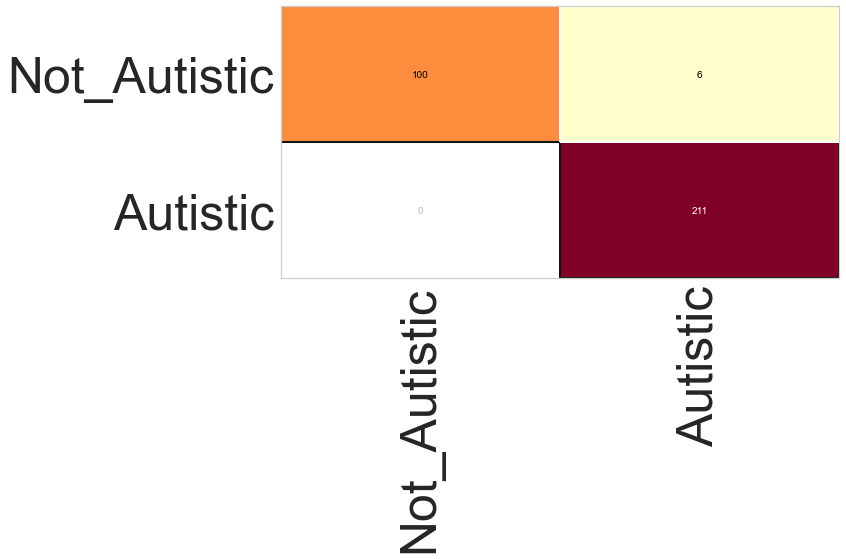

In [27]:
# Classification is a technique where we categorize data into a given number of classes like 'Not_Autistic','Autistic'. 
# The main goal of a classification problem is to identify the category/class to which a new data will fall under.

# Eval Metrics  - ConfusionMatrix
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression(solver='liblinear')

#The ConfusionMatrix visualizer taxes a model

classes = ['Not_Autistic','Autistic']

cm = ConfusionMatrix(model, classes=classes,  label_encoder={0: "Not_Autistic", 1: "Autistic"}, percent=False)
#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(10)

There are two possible predicted classes: "Autistic" and "Not_Autistic". If we were predicting the presence of a disease, for example, "yes" would mean they have the disease, and "no" would mean they don't have the disease.
The classifier made a total of 317 predictions
Out of those 317 cases, the classifier predicted "yes" 217 times, and "no" 100 times.
In reality, 211 patients in the sample have the disease, and 106 patients do not.
Accuracy: Overall, how often is the classifier correct?
(TP+TN)/total = (211+100)/317 = 0.98

<Figure size 720x360 with 0 Axes>

C:\Users\mghan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


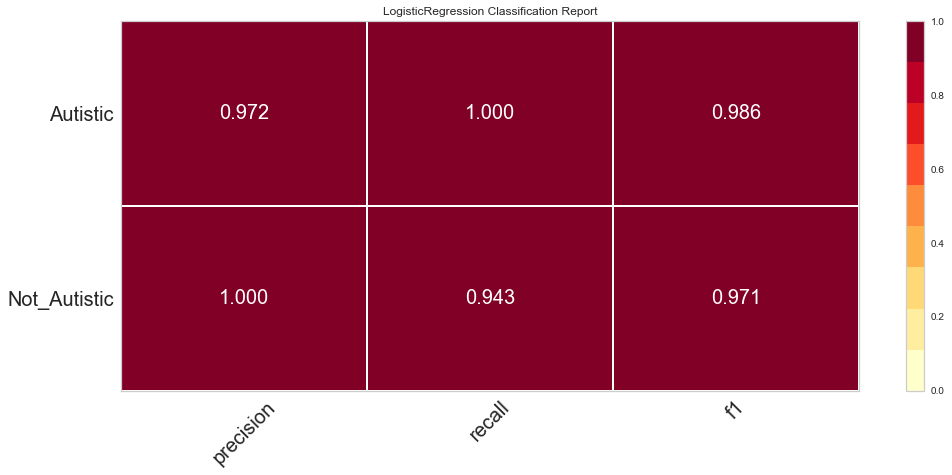

In [28]:
# ClassificationReport
#How did we do? 
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

#### Precision – What percent of your predictions were correct? 97.2%
#### Recall – What percent of the positive cases did you catch? 100%
#### F1 score – What percent of positive predictions were correct? 98.6%

C:\Users\mghan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


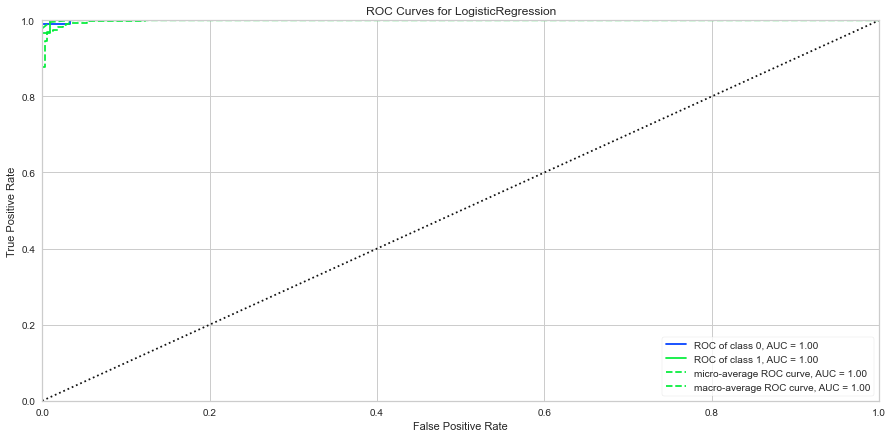

In [29]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model, pos_label = 1)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

classifier that does a very good job separating the classes will have an ROC curve that hugs the upper left corner of the plot
with accuracy rate of near 98%

## Milestone 4

In [30]:
#create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['Jaundice', 'Age_Mons']
data_model_X = pd.concat([df_todd[features_model], data_cat_dummies], axis=1)
# create a whole target dataset that can be used for train and validation data splitting
#data_model_y = df_todd.replace({'autism': {1: 'Autistic', 0: 'Not_Autistic'}})['ASD_Traits']
data_model_y = df_todd['ASD_Traits']
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

In [31]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Autistic and not-autistic
print('\n')
print('No. of autistic and not-autistic in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of autistic and not-autistic in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  737
No. of samples in validation set: 317


No. of autistic and not-autistic in the training set:
1    517
0    220
Name: ASD_Traits, dtype: int64


No. of autistic and not-autistic in the validation set:
1    211
0    106
Name: ASD_Traits, dtype: int64


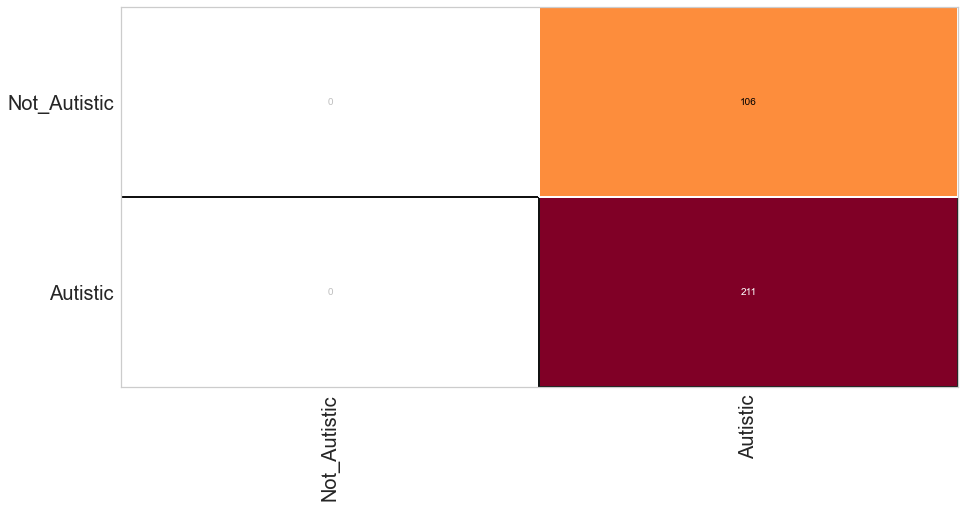

In [32]:
# Classification is a technique where we categorize data into a given number of classes like 'Not_Autistic','Autistic'. 
# The main goal of a classification problem is to identify the category/class to which a new data will fall under.

# Eval Metrics  - ConfusionMatrix
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression(solver='liblinear')

#The ConfusionMatrix visualizer taxes a model

classes = ['Not_Autistic','Autistic']

cm = ConfusionMatrix(model, classes=classes,  label_encoder={0: "Not_Autistic", 1: "Autistic"}, percent=False)
#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(10)

<Figure size 1080x504 with 0 Axes>

C:\Users\mghan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\mghan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


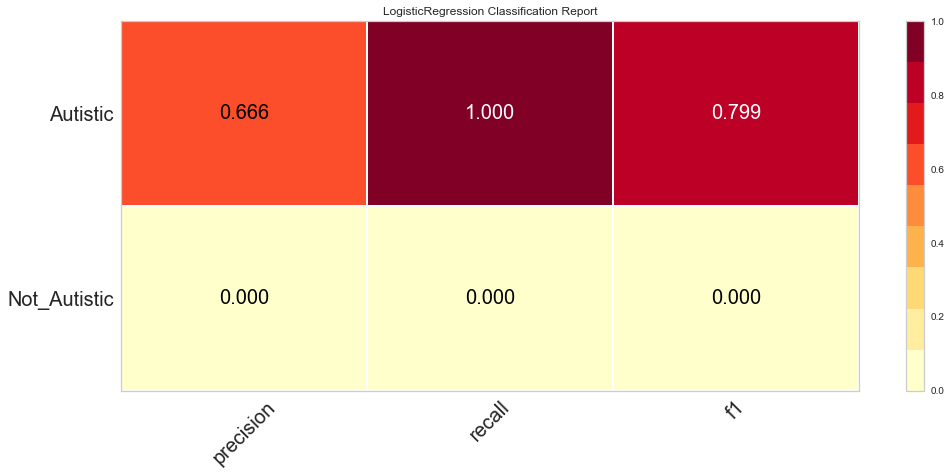

In [33]:
# ClassificationReport
#How did we do? 
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

Precision – What percent of your predictions were correct? 66.2% Recall – What percent of the positive cases did you catch? 100% F1 score – What percent of positive predictions were correct? .79% data is biased it is not all combination autistic and not autistic datas seems 'Jaundice', 'Age_Mons' are not good candidates as individuals predictors